In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cleaning Data

In [2]:
df = pd.read_csv("./data/Water_FINAL.csv", parse_dates = [['Date', 'Time']], index_col = 'Unnamed: 0')

/Users/claycarson/anaconda3/envs/dsi/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2,3,4,5,6,9,11,13,15,17,21,22,23,24,27,28,31,32,33,34,35,36,37,40,41,42,43,44,45,46,47,48,49,50,55,56,57,58,59,60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/claycarson/anaconda3/envs/dsi/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df.columns

Index(['Date_Time', 'Unnamed: 0.1', 'Agency', 'BiasPC', 'CloudCover',
       'Comments', 'Cruise', 'Database', 'FieldActivityEventType',
       'FieldActivityRemark', 'FlowStage', 'GaugeHeight', 'GroupCode', 'HUC12',
       'Lab', 'Latitude', 'Layer', 'Longitude', 'LowerPycnocline',
       'MeasureValue', 'Method', 'ModifiedDate', 'Other Comments',
       'Other Conditions', 'Parameter', 'ParameterName_CBP',
       'ParameterName_CMC', 'PrecipType', 'PrecisionPC', 'Pressure', 'Problem',
       'Program', 'Project', 'Qualifier', 'Rainfall',
       'Rainfall Within 24 Hours', 'Rainfall Within 48 Hours', 'SampleDepth',
       'SampleId', 'SampleReplicateType', 'SampleType', 'Sea State', 'Source',
       'Station', 'StationCode', 'StationName', 'Stream Flow', 'Tidal Stage',
       'TideStage', 'TierLevel', 'TotalDepth', 'Unit', 'UpperPycnocline',
       'Water Color', 'Water Color Description', 'Water Odor',
       'Water Odor Description', 'Water Surfaces', 'WaveHeight',
       'Weather C

In [4]:
df.drop(columns = 'Unnamed: 0.1', inplace = True)

In [5]:
# Creating a list of column indices that have over 30% NaN values
na_index = np.where(
    round(df.isna().sum()/
          len(df)*100, 2) 
    > 30)

In [6]:
# Applying the indicies to get the list of column names
na_columns = []
for ind in na_index:
    na_columns.append(df.columns[ind])

In [7]:
# Evaluating the individual columns for their percentage of NaN values
for column in na_columns:
    na_series = pd.Series(round(df[column].isna().sum()/
          len(df[column])*100, 2))
na_series

BiasPC                                     100.00
Comments                                    96.48
FieldActivityEventType                      92.75
FieldActivityRemark                        100.00
FlowStage                                   99.78
GaugeHeight                                 96.32
GroupCode                                   90.24
Lab                                         68.06
LowerPycnocline                             84.33
ModifiedDate                                90.24
Other Comments                              99.23
Other Conditions                            99.84
ParameterName_CMC                           90.24
PrecipType                                  69.83
PrecisionPC                                100.00
Pressure                                    97.27
Problem                                     98.89
Qualifier                                   96.67
Rainfall                                    99.25
Rainfall Within 24 Hours                    99.80


There are a lot of columns with over 90% NaN values

In [8]:
#Checking out the three columns under 50% NaN
for value in np.where(na_series.values < 50):
    for col in na_series[value].index:
        print(df[col].value_counts())

0.0 to <0.1M    779407
0.1 to <0.3M    642084
0.3 to <0.6M    244663
0.6 to <1.0M     81289
1.0 to <1.3M     16215
> 1.3M            1151
Name: WaveHeight, dtype: int64
SW     243183
NW     209279
S      204290
N      196571
NE     190750
W      152271
SE     127262
E      100946
SSW     41627
NNW     37795
NNE     33259
WSW     30344
ENE     28174
WNW     28140
SSE     24014
ESE     21789
VAR        70
sw         10
Name: WindDirection, dtype: int64
>1 To 10 Knots     1007658
>10 To 20 Knots     257623
0 To 1 Knot         166700
Calm                 16722
1-10 knots           16368
>20 To 30 Knots      11393
>30 To 40 Knots      11198
10-20 knots           1534
>40 Knots              551
1-10 Knots             133
10-20 Knots             29
20-30 knots              6
Name: WindSpeed, dtype: int64


I believe that WindSpeed and Waveheight can be imputed, but I'm not sure for WindDirection since it's more specific. Additionally, I'm going to leave the 'Problem' column in, because the few values that it does have indicate problems with the samples, which are data that I will want to drop

In [9]:
# Dropping the columns with too many NaN values for potential imputation
df.drop(columns = 
        na_series.index.drop(labels = ['Problem', 'WaveHeight', 'WindSpeed']), 
        inplace = True)

In [10]:
# Dropping data with any kind of 'Problem' value
df = df[df.Problem.isna()==True]

df.drop(columns = 'Problem', inplace = True)

In [11]:
# Checking the other column NaN values
round(df.isna().sum()/
          len(df)*100, 2)

Date_Time               0.00
Agency                  9.82
CloudCover             17.52
Cruise                  9.82
Database                0.00
HUC12                   9.82
Latitude                0.00
Layer                   9.84
Longitude               0.00
MeasureValue            0.00
Method                  9.82
Parameter               0.00
ParameterName_CBP       0.00
Program                 9.82
Project                 9.82
SampleDepth             0.14
SampleId                0.00
SampleReplicateType     9.82
SampleType              9.84
Source                  9.82
Station                 9.82
TideStage              23.67
TierLevel               0.00
TotalDepth             22.14
Unit                    0.00
WaveHeight             34.54
WindSpeed              44.77
Point                   0.00
HUC12_                  0.00
HUCNAME_                0.00
FIPS_                   0.00
COUNTY_                 0.00
STATE_                  0.00
dtype: float64

We will leave any columns with under 10% NaN values because we'll just end up dropping the null data

In [12]:
df.TideStage.value_counts(normalize=True)

Ebb Tide           0.501558
Flood Tide         0.413212
High Slack Tide    0.043134
Low Slack Tide     0.042096
Name: TideStage, dtype: float64

It looks like we could fill this one in with random alternating values, since they're split almost 50/50 between 'Ebb' and 'Flood' tides

In [13]:
print(df.TotalDepth.max(), df.TotalDepth.mean(), df.TotalDepth.median(), df.TotalDepth.std())

153.0 11.506214285748527 10.0 9.198505823186569


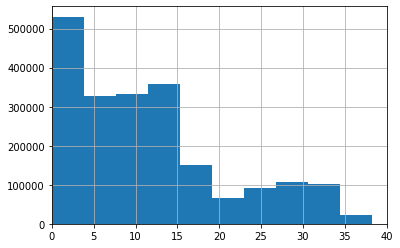

In [14]:
df.TotalDepth.hist(bins = 40)
plt.xlim([0, 40]);

This is a column we could fill in with the mean value

In [15]:
df['CloudCover'].value_counts()

Clear (0-10%)                          738071
Overcast (>90%)                        501394
Scattered To Partly Cloudy (10-50%)    453962
Partly To Broken (50-90%)              351833
Cloud (No Percentage)                  114209
Hazy                                    32739
Foggy                                   12299
Clear                                    2419
Partially cloudy (10-50%)                1587
Partially cloudy (50-90%)                 775
Cloudy (no percentage)                     35
Name: CloudCover, dtype: int64

# Imputation

So the five columns that need to be imputed are CloudCover, TotalDepth, Tidestage, WaveHeight, and WindSpeed. I'm going to make the executive decision to drop CloudCover, WaveHeight, and WindSpeed because I don't see them having an overwhelming effect on the values that we want to look at and because there are too many values to impute with no discernible pattern

In [16]:
import random

In [17]:
# Replacing TideStage NaN values with a randomized choice of "Ebb Tide" or "Flood Tide"
tides = ['Ebb Tide', 'Flood Tide']

df['TideStage'].fillna(np.nan, inplace = True)

df.loc[:, 'TideStage'] = df['TideStage'].apply(lambda x: random.choice(tides) if x is np.nan else x)

In [18]:
df[['SampleId','TotalDepth', 'SampleDepth']].groupby('SampleId').max()

,TotalDepth,SampleDepth
SampleId,,
1.0,NaN,14.30
2.0,NaN,5.00
2179.0,1.8,1.75
2180.0,NaN,0.30
2181.0,NaN,0.00
...,...,...
462087.0,33.0,32.00
462088.0,35.5,34.00
462089.0,31.5,30.00


Now this is interesting. It looks like the TotalDepth values for each sample are almost perfect approximations of the maximum SampleDepth value. I'm going to use this relationship to fill in each missing TotalDepth value

In [19]:
df['TotalDepth'].isna().sum()

592962

In [22]:
# Grouping the depth columns by SampleId into a temporary dataframe
depth_grouped = df[['SampleId','TotalDepth', 'SampleDepth']].groupby('SampleId').max()

# Filling the NaN values of TotalDepth with the max SampleDepth value
filled_depth = depth_grouped['TotalDepth'].fillna(depth_grouped['SampleDepth'])

# Merging the newly filled TotalDepth series into the original dataframe
df = pd.merge(df, filled_depth, how = 'outer', on = 'SampleId')

# Rename the new TotalDepth_y column back to 'TotalDepth'
df.rename(columns = {'TotalDepth_y' :'TotalDepth'}, inplace = True)

In [24]:
# Checking to see if there are any remaining NaN values
df['TotalDepth'].isna().sum()

0

So at this point, all of our relevant columns that were missing over 10% of data have either been dropped or imputed, so we will drop the remaining NaN values since they make up less than 10% of the data  

In [32]:
# Dropping columns with over 10% missing values
for column in df:
    if round(df[column].isna().sum()/len(df) * 100, 2) > 10:
        df.drop(columns = column, inplace = True)

In [35]:
# Dropping all rows with missing values
df.dropna(inplace = True)

In [37]:
print(df.shape)
print(df.isna().sum().sum())

(2414996, 30)
0


We have almost 2.5 million data points left to work with and no null values

In [38]:
df.to_csv('./data/Water_CLEAN.csv')